# Question 1
Standard deviation refers to the spread of individual data points in a dataset
Standard error of the mean refers to the spread of the sample mean as an estimate of the population mean.

# Question 2

### Step 1
Bootstrap by repeatedly resampling from the original dataset to generate a large number of resamples. For each resample, calculate the sample mean.

### Step 2
Calculate the standard deviation of the bootstrapped sample means
Then use standard deviation to calculate the standard error of the mean 

### Step 3
Calculate the mean of the bootstrapped sample means.
Then use the mean, the standard error of the mean to calculate 95% confidence interval by formula: CI=Mean of bootstrapped means±Z×SEM
For a 95% confidence interval, the value of 𝑍(the z-score corresponding to 95% coverage) is approximately 1.96.

# Question 3
Directly use the 2.5th and 97.5th percentiles of the mean of the computed bootstrap sample, via np.quantile(). This will capture the middle 95% of the distribution.
lower_bound = np.quantile(bootstrapped_means, 0.025)
upper_bound = np.quantile(bootstrapped_means, 0.975)
### For example:

In [3]:
import numpy as np

data = np.random.randn(100) 

n_bootstraps = 1000

bootstrapped_means = np.zeros(n_bootstraps)

for i in range(n_bootstraps):
    resample = np.random.choice(data, size=len(data), replace=True)
    bootstrapped_means[i] = np.mean(resample)

lower_bound = np.quantile(bootstrapped_means, 0.025)
upper_bound = np.quantile(bootstrapped_means, 0.975)

print(f"95% Bootstrapped Confidence Interval: ({lower_bound}, {upper_bound})")


95% Bootstrapped Confidence Interval: (-0.17697689226249758, 0.23287830164872125)


# Question 4

In [23]:
import numpy as np

data = np.random.randn(100)  # Generate 100 random data points

n_bootstraps = 1000

# Store bootstrapped means
bootstrapped_stats = np.zeros(n_bootstraps)

# Resample with replacement and calculate the mean
for i in range(n_bootstraps):
    resample = np.random.choice(data, size=len(data), replace=True)
    bootstrapped_stats[i] = np.mean(resample)  # Change np.mean to np.median for median CI

# Calculate the 95% confidence interval
lower_bound = np.quantile(bootstrapped_stats, 0.025)
upper_bound = np.quantile(bootstrapped_stats, 0.975)

print({lower_bound}, {upper_bound})

{-0.1490101982856277} {0.2884430143261062}


### Modify the Code for Other Statistics
First, create a bootstrap for median

Then, change np.mean(resample) to np.median(resample) 

In [25]:
bootstrap_medians = np.zeros(n_bootstrap)

for i in range(n_bootstrap):
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    bootstrap_medians[i] = np.median(bootstrap_sample)

lower_median, upper_median = np.quantile(bootstrap_medians, [0.025, 0.975])

print({lower_median}, {upper_median})

{2.8499999999999996} {7.800000000000001}


# Question 5

The population parameter is the real, actural value, such as the actual mean or proportion of the entire population. But we can't accurately measure the entire population because it's too difficult. Therefore it can only be estimated using samples.

A sample statistic is a value calculated from samples (e.g. sample mean) that is used to estimate the population parameter. This is only an approximation based on limited data.

#### Why This Matters for Confidence Intervals:
Confidence intervals indicate the degree of uncertainty we have about the overall parameter based on the sample statistics. Different samples may produce different results.


# Question 6

1. Bootstrapping is the method of resampling data to estimate certain data. For example, let's say I have a bag of fruits, like, bananas, apples, oranges, whatever. But the bag is so big that I can't tell exactly how many of each fruit are in it. So I could start by taking 10 fruits out. Then I randomly take one of the 10 fruits, record it and put it back. Repeat this 10 times and I get another set of 10 fruits. Repeating this step over and over, eventually I can look at the average of all these groups to see how they are distributed, which helps me estimate the number of each fruit in the bag without having to count them one by one.

2. The main purpose of the bootstrap method is to get a better understanding of the entire population by obtaining a sample without the need to obtain a large amount of data, such as mean, median or even confidence intervals

3. Suppose I think there are 50 bananas and 100 apples in the bag. So I carry out the steps described in the question 1 and finally see how many apples in these groups are around 100, same for bananas. The closer it is the more correct my hypothesis is

# Question 7
If the confidence interval covers zero, this means that the true average effect of the drug may be zero. Because of the variability of the sample, it may happen that the sample is selected from a very small proportion of people who have an effect, and the actual effect of the drug is really inside the “zero” included in the confidence interval. So the possibility of a zero effect cannot be denied.

If the null hypothesis is to be rejected, the confidence interval must not include zero. For example, the confidence interval is 0.1<u<0.2, which means that the effect cannot be zero, so, the null hypothesis is rejected

# Question 8
H0: Vaccines have no effect on health scores(means that the final health scores of vaccinated patients were not significantly different from their initial health scores.)

H1: Vaccines have an impact on health scores


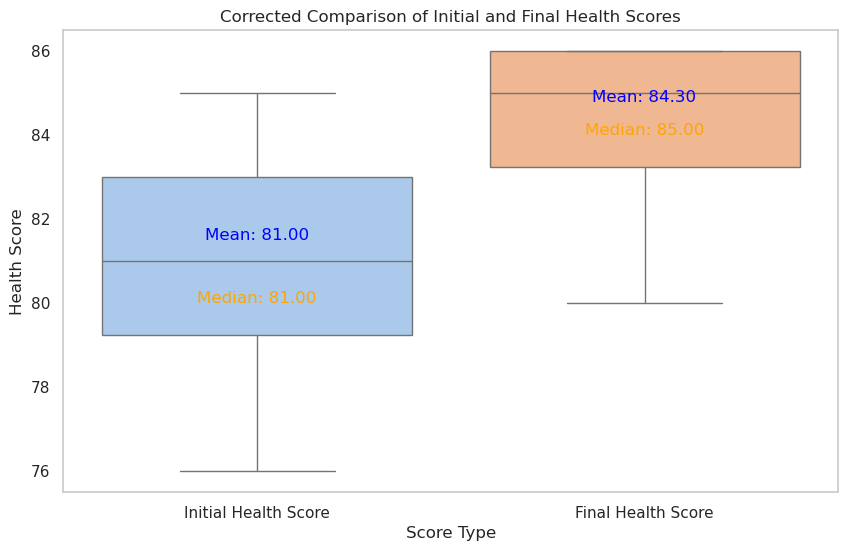

Bootstrapped Mean Difference: 3.26
95% Confidence Interval: [0.70, 5.50]


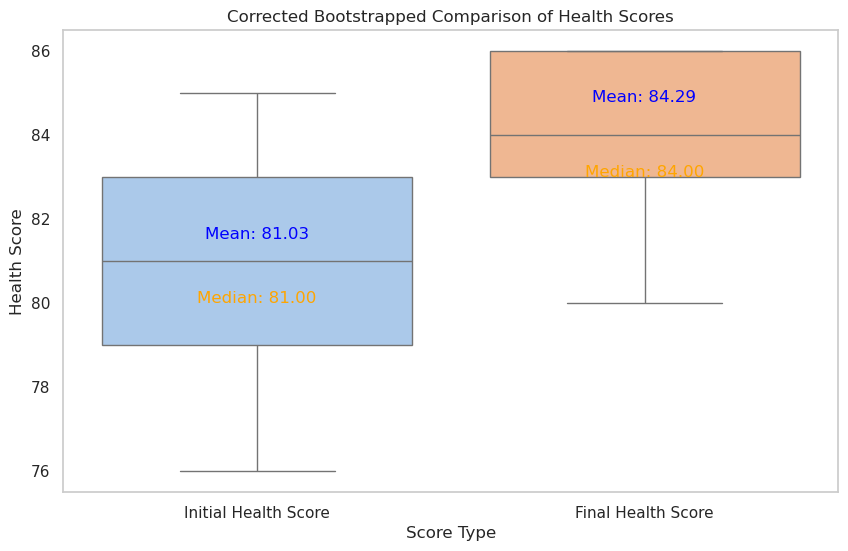

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/LeoLuLL/LeoLu-Sta130/main/vaccine_data.csv"
data = pd.read_csv(url)

def plot_boxplots(data, title, save_as=None):
    melted_data = pd.melt(data, id_vars=["PatientID", "Age", "Gender"], 
                           value_vars=["InitialHealthScore", "FinalHealthScore"], 
                           var_name="ScoreType", value_name="HealthScore")

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="ScoreType", y="HealthScore", data=melted_data, hue="ScoreType", palette="pastel", legend=False)

    means = melted_data.groupby("ScoreType")["HealthScore"].mean().to_dict()
    medians = melted_data.groupby("ScoreType")["HealthScore"].median().to_dict()

    for i, score_type in enumerate(["InitialHealthScore", "FinalHealthScore"]):
        plt.text(i, means[score_type] + 0.5, f'Mean: {means[score_type]:.2f}', 
                 horizontalalignment='center', color='blue', fontsize=12)
        plt.text(i, medians[score_type] - 1, f'Median: {medians[score_type]:.2f}', 
                 horizontalalignment='center', color='orange', fontsize=12)

    plt.title(title)
    plt.ylabel("Health Score")
    plt.xlabel("Score Type")
    plt.xticks(ticks=[0, 1], labels=["Initial Health Score", "Final Health Score"])
    plt.grid(axis='y')

    if save_as:
        plt.savefig(save_as, format='png', dpi=300, bbox_inches='tight')
    
    plt.show()

plot_boxplots(data, "Corrected Comparison of Initial and Final Health Scores", save_as="initial_health_scores.png")

def bootstrap_samples(data, num_iterations=1000):
    bootstrapped_data = []

    for _ in range(num_iterations):
        sample = data.sample(frac=1, replace=True)
        bootstrapped_data.append(sample)

    return pd.concat(bootstrapped_data, ignore_index=True)

bootstrapped_data = bootstrap_samples(data, 1000)

def bootstrap_ci(data, num_iterations=1000, confidence_level=0.95):
    boot_means = []
    for _ in range(num_iterations):
        sample = data.sample(frac=1, replace=True)
        boot_mean = (sample['FinalHealthScore'] - sample['InitialHealthScore']).mean()
        boot_means.append(boot_mean)

    lower_bound = np.percentile(boot_means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(boot_means, (1 + confidence_level) / 2 * 100)
    
    return np.mean(boot_means), lower_bound, upper_bound

mean_diff, ci_lower, ci_upper = bootstrap_ci(data)

print(f"Bootstrapped Mean Difference: {mean_diff:.2f}")
print(f"{95}% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")

def plot_bootstrapped_boxplots(bootstrapped_data, title, save_as=None):
    boot_melted_data = pd.melt(bootstrapped_data, id_vars=["PatientID", "Age", "Gender"], 
                                 value_vars=["InitialHealthScore", "FinalHealthScore"], 
                                 var_name="ScoreType", value_name="HealthScore")

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="ScoreType", y="HealthScore", data=boot_melted_data, hue="ScoreType", palette="pastel", legend=False)

    boot_means = boot_melted_data.groupby("ScoreType")["HealthScore"].mean().to_dict()
    boot_medians = boot_melted_data.groupby("ScoreType")["HealthScore"].median().to_dict()

    for i, score_type in enumerate(["InitialHealthScore", "FinalHealthScore"]):
        plt.text(i, boot_means[score_type] + 0.5, f'Mean: {boot_means[score_type]:.2f}', 
                 horizontalalignment='center', color='blue', fontsize=12)
        plt.text(i, boot_medians[score_type] - 1, f'Median: {boot_medians[score_type]:.2f}', 
                 horizontalalignment='center', color='orange', fontsize=12)

    plt.title(title)
    plt.ylabel("Health Score")
    plt.xlabel("Score Type")
    plt.xticks(ticks=[0, 1], labels=["Initial Health Score", "Final Health Score"])
    plt.grid(axis='y')

    if save_as:
        plt.savefig(save_as, format='png', dpi=300, bbox_inches='tight')
    
    plt.show()

plot_bootstrapped_boxplots(bootstrapped_data, "Corrected Bootstrapped Comparison of Health Scores", save_as="bootstrapped_health_scores.png")


I used box plot to visualize the data as a way to compare initial and final health scores. As you can see, the initial health score has a mean and median of 81, while the final health score has a mean of 84.3 and a median of 85. From the data of the given sample of 10, it appears that the vaccine did make a difference. However, these samples do not fully reflect the true vaccine effect, and the confidence intervals are not clear. So we need more samples, and with bootstrapping we can model the real situation. Using the 95% confidence interval, we can conclude that the effect of the vaccine on the health score is 0.70<V<5.50,where V is the effect of the vaccine on the health score. From the second Box plot, we can see that the mean and median of the final health scores are still higher than the initial values. And since the lower limit of 0.7 is higher than 0, the vaccine does not have zero effect, thus reject H0, accept H1

# Question 9
YES

# Summary from ChatGPT
## 1.
In this conversation, we discussed how to create a 95% confidence interval using the "standard error of the mean" (SEM) from bootstrapped sample means. The process involves generating multiple bootstrap samples, calculating the mean for each, determining the SEM (standard deviation of these means), and then constructing the confidence interval by multiplying the SEM by 1.96 to cover 95% of the bootstrapped sample means.
## 2.
In this conversation, we discussed how to create a 95% bootstrapped confidence interval without using the standard deviation to estimate the standard error. Instead, the method involves calculating the lower (2.5th percentile) and upper (97.5th percentile) bounds of the bootstrapped sample means using the `np.quantile()` function. An example code was provided to demonstrate how to implement this approach.
## 3.
In this conversation, you requested Python code to compute a 95% bootstrap confidence interval for the population mean based on a sample. The provided code includes instructions for modifying the calculation to compute a confidence interval for other population parameters, such as the median. The code demonstrates how to generate bootstrap samples, compute a statistic for each sample (mean or median), and calculate the confidence interval using the `np.quantile()` function.
## 4.
In this conversation, we discussed the importance of distinguishing between a population parameter and a sample statistic when working with confidence intervals. The population parameter is the true, unknown value we aim to estimate, while the sample statistic is the value calculated from the sample. Confidence intervals are built around the sample statistic to estimate the likely range where the population parameter lies, accounting for the uncertainty due to sampling variability. This distinction is essential for making inferences about the population based on sample data.
## 5.
We talked about bootstrapping, which is a statistical method for estimating the reliability of a sample statistic by creating multiple new samples from the original data through random selection with replacement. The main purpose of bootstrapping is to assess how confident we can be about our estimates, like calculating confidence intervals to see where the true population average might lie.

We also discussed how you can use bootstrapping to test a hypothesis about a population average. If you think the average weight of candies is 10 grams and you sample a handful that averages 9 grams, you’d create many bootstrapped samples to see how many of their averages are around 10 grams. This helps you determine whether your initial guess is plausible or not.
## 6.
In this conversation, you requested assistance with analyzing a vaccine dataset by visualizing health scores before and after vaccination. The main points discussed include:

1. **Data Visualization**: You wanted to create box plots for the initial and final health scores, highlighting the mean and median values, and save the plots as PNG files.
  
2. **Bootstrapping Analysis**: We discussed how to perform bootstrapping to create samples from the dataset, calculate the confidence intervals for the mean differences between initial and final health scores, and visualize these results.

3. **Code Issues**: You pointed out errors and warnings related to the mean and median calculations and some deprecation warnings in the code. We updated the plotting functions to ensure accurate calculations and to address the warnings.

4. **Final Code**: I provided an updated version of the code that includes saving the visualizations as PNG files, ensures correct mean and median calculations, and avoids deprecation warnings.

The updated code was designed to be executed in a Python environment, allowing you to visualize the data effectively and save the output for further analysis or reporting.

# History of ChatGPT
1.https://chatgpt.com/share/66fca7f2-54a0-800b-b951-44eff91c75cf

2.https://chatgpt.com/share/66fca808-17c0-800b-8670-ba5c401036a1

3.https://chatgpt.com/share/66fca812-b0a0-800b-b280-c8a86bf83a50

4.https://chatgpt.com/share/66fca81b-5acc-800b-b828-b5c403ff2472

5.https://chatgpt.com/share/66fca823-a6a8-800b-806d-e5d594e15c28

6.https://chatgpt.com/share/66fca86e-866c-800b-b2a9-5ce4340c1dd8